# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime


# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)





## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)

saved_lats=[]
saved_lngs=[]

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        saved_lats.append(lat_lng[0])
        saved_lngs.append(lat_lng[1])



# Print the city count to confirm sufficient count
len(cities)



613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create base URL for open weather map API call
query_url = "http://api.openweathermap.org/data/2.5/weather?"
 
city_name = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1
sets = 1

# Print statement for log.
print("Beginning Data Retrieval")

new_url = query_url + "appid=" + weather_api_key + "&q=" + city
weather_response = requests.get(query_url).json()
    
# Loop through all cities in cities list.
for city in cities:
    
    # Try statement to append calls where values are found.
    try:
        response = requests.get(f'{new_url}&q={city}').json()
        city_name.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
        print(f'Processing Record {record} | {city}')
        
        # Increase record counter.
        record += 1
        
             
        
    # If no record found for city, then skip.
    except:
        print('City not found.')
    continue

Beginning Data Retrieval
City not found.
City not found.
Processing Record 1 | tabuk
Processing Record 2 | butaritari
City not found.
Processing Record 3 | vaini
Processing Record 4 | kaitangata
Processing Record 5 | ushuaia
Processing Record 6 | genhe
Processing Record 7 | hasaki
Processing Record 8 | tuktoyaktuk
City not found.
Processing Record 9 | poum
Processing Record 10 | victoria
Processing Record 11 | goderich
Processing Record 12 | khatanga
City not found.
Processing Record 13 | rikitea
City not found.
Processing Record 14 | vila
Processing Record 15 | te anau
Processing Record 16 | pevek
Processing Record 17 | hofn
City not found.
Processing Record 18 | upernavik
City not found.
Processing Record 19 | jamestown
City not found.
City not found.
Processing Record 20 | olafsvik
Processing Record 21 | illoqqortoormiut
City not found.
City not found.
Processing Record 22 | punta arenas
Processing Record 23 | hobart
City not found.
City not found.
Processing Record 24 | mar del pla

Processing Record 159 | marcona
City not found.
City not found.
City not found.
Processing Record 160 | isangel
Processing Record 161 | namibe
City not found.
City not found.
City not found.
City not found.
Processing Record 162 | yenagoa
City not found.
City not found.
City not found.
City not found.
Processing Record 163 | bargal
City not found.
City not found.
City not found.
Processing Record 164 | tiksi
Processing Record 165 | grand gaube
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
Processing Record 166 | grand river south east
City not found.
City not found.
Processing Record 167 | sorland
City not found.
Processing Record 168 | dakar
Processing Record 169 | laguna
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
City not found.
Processing Record 170 | bubaque
City not found.
City not found.
City not found.
City not found.
Processing Record 171 | norm

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = {
    'City': city_name,
    'Cloudiness': clouds,
    'Country': countries,
    'Date': dates,
    'Humidity': humidities,
    'Lat': lats,
    'Lng': lngs,
    'Max Temperature': max_temps,
    'Wind Speed': wind_speeds
}

# Create new DF for values in dictionary.
df_weather = pd.DataFrame(weather_data)

# Display count of weather values per column.
df_weather.count()


City               225
Cloudiness         225
Country            225
Date               225
Humidity           225
Lat                225
Lng                225
Max Temperature    225
Wind Speed         225
dtype: int64

In [5]:
# Save csv file.
df_weather.to_csv('weather_data.csv')

In [6]:
df_weather.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Cabo Rojo,45,PR,1667251249,86,18.0866,-67.1457,301.89,3.73
1,Barrow,0,US,1667251194,84,71.2906,-156.7887,252.16,6.69
2,Barrow,0,US,1667251193,84,71.2906,-156.7887,252.16,6.69
3,Cabo Rojo,45,PR,1667251250,86,18.0866,-67.1457,301.89,3.73
4,Barrow,0,US,1667251195,84,71.2906,-156.7887,252.16,6.69


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
inspect_cities = df_weather["Humidity"].describe(include = "all")
inspect_cities

count    225.000000
mean      84.915556
std        0.998650
min       84.000000
25%       84.000000
50%       84.000000
75%       86.000000
max       86.000000
Name: Humidity, dtype: float64

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city2_df=inspect_cities.to_csv("../output_data/Retrieved_City_Weather_Data.csv")
city2_df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

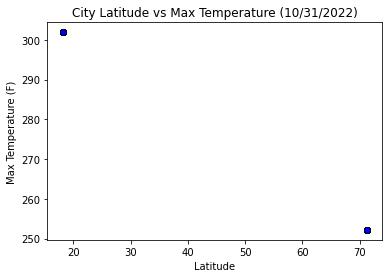

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(df_weather["Lat"]).astype(float), pd.to_numeric(df_weather["Max Temperature"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.show()

## Latitude vs. Humidity Plot

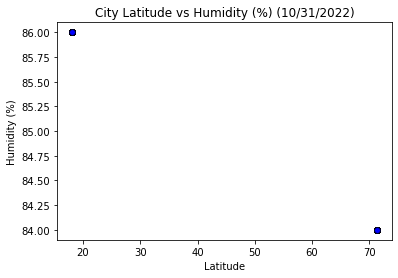

In [11]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(df_weather["Lat"]).astype(float), pd.to_numeric(df_weather["Humidity"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
plt.show()

## Latitude vs. Cloudiness Plot

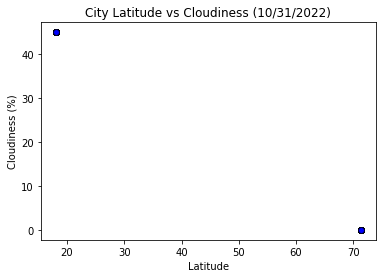

In [12]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(df_weather["Lat"]).astype(float), pd.to_numeric(df_weather["Cloudiness"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")


plt.show()

## Latitude vs. Wind Speed Plot

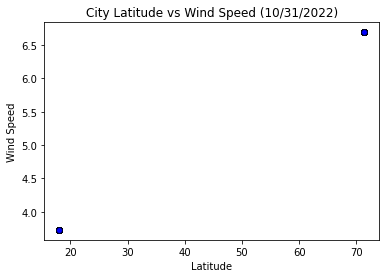

In [13]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(df_weather["Lat"]).astype(float), pd.to_numeric(df_weather["Wind Speed"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.show()

## Linear Regression

In [14]:
northern_df = df_weather.loc[pd.to_numeric(df_weather["Lat"]).astype(float) > 0, :]
southern_df = df_weather.loc[pd.to_numeric(df_weather["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.93x + 318.8
The r-squared is: -0.9999999999999997
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


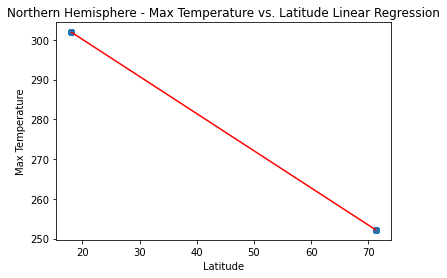

In [15]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temperature vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.93x + 318.8
The r-squared is: -0.9999999999999997
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


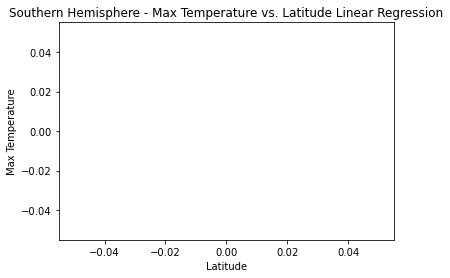

In [19]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temperature']).astype(float)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temperature vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.04x + 86.68
The r-squared is: -0.9999999999999998
The regression does not display much of a correlation between the data sets.


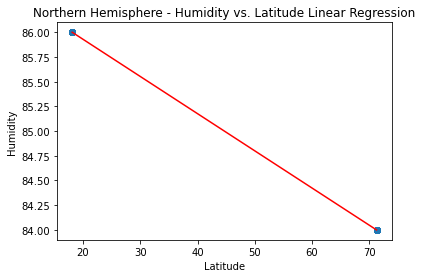

In [20]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.04x + 86.68
The r-squared is: -0.9999999999999998
The regression does not display much of a correlation between the data sets.


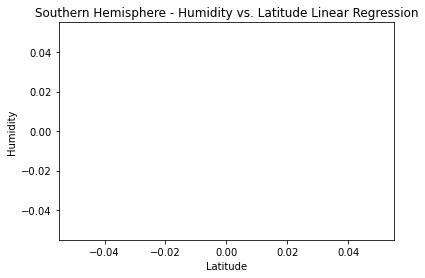

In [22]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.85x + 60.3
The r-squared is: -0.9999999999999998
The regression does not display much of a correlation between the data sets.


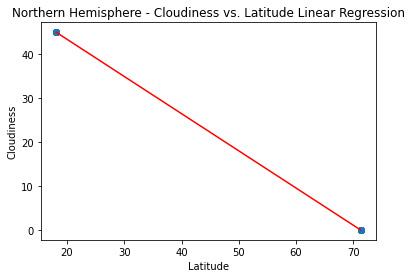

In [23]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.85x + 60.3
The r-squared is: -0.9999999999999998
The regression does not display much of a correlation between the data sets.


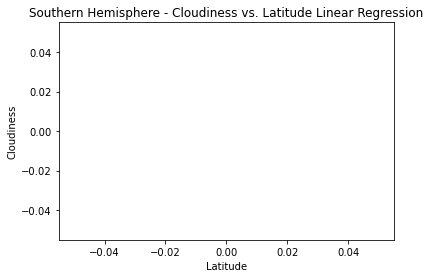

In [25]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.85x + 60.3
The r-squared is: -0.9999999999999998
The regression does not display much of a correlation between the data sets.


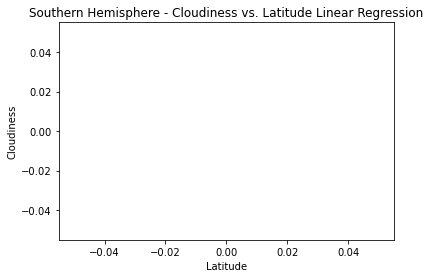

In [27]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.85x + 60.3
The r-squared is: -0.9999999999999998
The regression does not display much of a correlation between the data sets.


<function matplotlib.pyplot.show(close=None, block=None)>

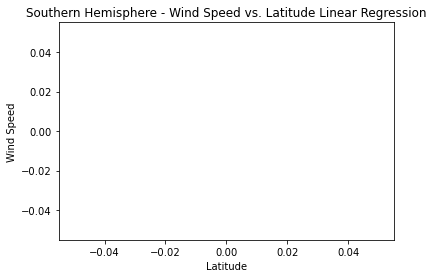

In [29]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show